<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Method-01:-Q-Q-plot" data-toc-modified-id="Method-01:-Q-Q-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Method 01: Q-Q plot</a></span></li><li><span><a href="#Method-02:-Shapiro-Wilk-test-for-normality" data-toc-modified-id="Method-02:-Shapiro-Wilk-test-for-normality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Method 02: Shapiro-Wilk test for normality</a></span></li><li><span><a href="#Method-03:-Using-Skewness-and-Kurtosis" data-toc-modified-id="Method-03:-Using-Skewness-and-Kurtosis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Method 03: Using Skewness and Kurtosis</a></span></li><li><span><a href="#Method-04:-Jarque–Bera-test-in-Python" data-toc-modified-id="Method-04:-Jarque–Bera-test-in-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method 04: Jarque–Bera test in Python</a></span></li><li><span><a href="#Method-05:-Kolmogorov-Smirnov-test" data-toc-modified-id="Method-05:-Kolmogorov-Smirnov-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Method 05: Kolmogorov-Smirnov test</a></span></li><li><span><a href="#Method-06:-Anderson-Darling-test" data-toc-modified-id="Method-06:-Anderson-Darling-test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Method 06: Anderson-Darling test</a></span></li></ul></div>

**Normal and not-normal data preparation**

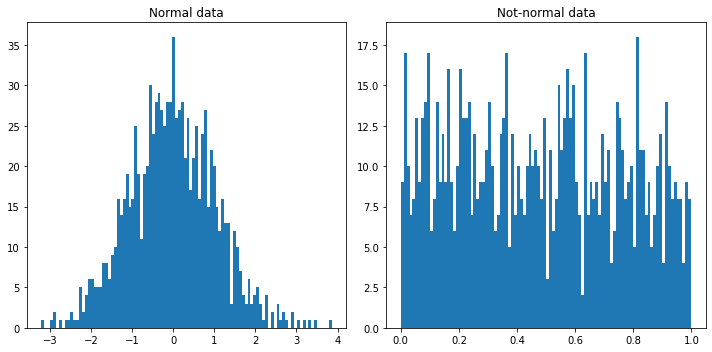

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html
a = np.random.randn(1000) # conforms to the normal distribution
b = np.random.rand(1000) # random values in 0 to 1

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(a, bins=100)
ax2.hist(b, bins=100)

ax1.set_title('Normal data')
ax2.set_title('Not-normal data')
fig.tight_layout()
plt.show()

# Method 01: Q-Q plot

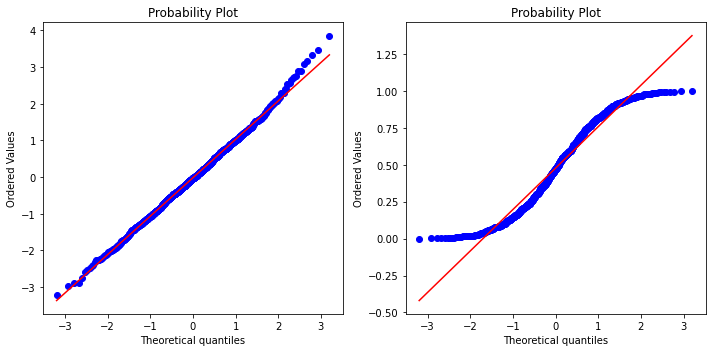

In [2]:
import scipy.stats as stats

fig2 = plt.figure(figsize=(10, 5))
ax3 = fig2.add_subplot(1, 2, 1)
ax4 = fig2.add_subplot(1, 2, 2)
stats.probplot(a, dist='norm', plot=ax3)
stats.probplot(b, dist='norm', plot=ax4)
fig2.tight_layout()
plt.show()

# Method 02: Shapiro-Wilk test for normality

What is the Shapiro-Wilk test? In one word, the Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution specifically. By using [shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html?highlight=shapiro#scipy.stats.shapiro) you will need to care about 2 variables, statistic and pvalue. Here’s the W statistic [explanation](https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm).

![](images/w_statistic.png)

For N > 5000 the W test statistic is accurate but the p-value may not be. The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size. This means p-value is around 0.05 or above 0.05, we can’t reject this null hypothesis. So this is possibly normally distributed. If p-value is far from 5% (0.05) then we can reject the null hypothesis. Let’s see how the calculation went for our data.

<span style="color:red"> Note: one of the biggest limitations of this test is the size bias, meaning that the larger the size of the sample is, the more likely you are to get a statistically significant result.</span>

In [3]:
from scipy import stats
c = stats.shapiro(a)
d = stats.shapiro(b)

print('W statistic is {0} and p-value is {1}'.format(c[0], c[1]))
#W statistic is 0.998044490814209 and p-value is 0.301758736371994
# can't reject the null hypothesis, it is likely normally distributed

print('W statistic is {0} and p-value is {1}'.format(d[0], d[1]))
#W statistic is 0.9490579962730408 and p-value is 4.253243595739461e-18
# can reject the null hypothesis, this should not be the normal distribution

W statistic is 0.9980061054229736 and p-value is 0.2852003872394562
W statistic is 0.9543534517288208 and p-value is 4.371116502156022e-17


# Method 03: Using Skewness and Kurtosis

If a skewness is positive, it means the right hand tail is more longer and if a skewness is negative, the left hand tail tends to be longer in general. If it falls between -0.5 and 0.5, that data are fairly symmetrical.

A kurtosis is said to measure the tail heaviness of the distribution. It increases as the tails become heavier while it decreases when the tails get lighter. We can assume that a kurtosis is 3 for the normal distribution.

For the 2 data sets, the first one has the close statistics values for the normal distribution. Please note that skewness and kurtosis are the statistics not to test the normality but we can just compare statistics values to know if a given distribution has closer values.

In [4]:
from scipy import stats


print('Skewness is {0} and Kurtosis is {1}'.format(stats.skew(a), stats.kurtosis(a, fisher=False)))
print('Skewness is {0} and Kurtosis is {1}'.format(stats.skew(b), stats.kurtosis(b, fisher=False)))

print()
print(stats.describe(a))
print()
print(stats.describe(b))

Skewness is 0.13210251958658772 and Kurtosis is 3.217729906825515
Skewness is 0.07698520682980627 and Kurtosis is 1.803863780702134

DescribeResult(nobs=1000, minmax=(-3.209955381978046, 3.85793967348964), mean=-0.016772157343909157, variance=1.0948818756325507, skewness=0.13210251958658772, kurtosis=0.21772990682551496)

DescribeResult(nobs=1000, minmax=(1.4618569125435243e-05, 0.9986783860190713), mean=0.47727525411345006, variance=0.08188220533482789, skewness=0.07698520682980627, kurtosis=-1.196136219297866)


In [5]:
x = stats.describe(a)

In [6]:
import pandas as pd

index = ['nobs','minmax','mean','variance','skewness','kurtosis']
pd.Series(x, index=index)

nobs                                          1000
minmax      (-3.209955381978046, 3.85793967348964)
mean                                     -0.016772
variance                                  1.094882
skewness                                  0.132103
kurtosis                                   0.21773
dtype: object

In [7]:
pd.Series(a).describe()

count    1000.000000
mean       -0.016772
std         1.046366
min        -3.209955
25%        -0.706067
50%        -0.026293
75%         0.690765
max         3.857940
dtype: float64

In [8]:
help(stats.describe)

Help on function describe in module scipy.stats.stats:

describe(a, axis=0, ddof=1, bias=True, nan_policy='propagate')
    Compute several descriptive statistics of the passed array.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : int or None, optional
        Axis along which statistics are calculated. Default is 0.
        If None, compute over the whole array `a`.
    ddof : int, optional
        Delta degrees of freedom (only for variance).  Default is 1.
    bias : bool, optional
        If False, then the skewness and kurtosis calculations are corrected
        for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
        * 'propagate': returns nan
        * 'raise': throws an error
        * 'omit': performs the calculations ignoring nan values
    
    Returns
    -------
    nobs : int o

# Method 04: Jarque–Bera test in Python

Jarque-Bera is one of the normality tests or specifically a goodness of fit test of matching skewness and kurtosis to that of a normal distribution.

Its statistic is non-negative and large values signal significant deviation from normal distribution.

The test statistic JB of Jarque-Bera is defined by:

$JB = \frac{n}{6} \times \bigg(S^2 + \frac{(K-3)^2}{4} \bigg)$

where 𝑆 is the sample skewness, 𝐾 is the sample kurtosis, and 𝑛 is the sample size.

The hypotheses:

𝐻0:sample 𝑆 and sample 𝐾 is not significantly different from normal distribution

𝐻1:sample 𝑆 and sample 𝐾 is significantly different from normal distribution

Now we can calculate the Jarque-Bera test statistic in Python and find the corresponding 𝑝-value:

In [9]:
from scipy.stats import jarque_bera

result = (jarque_bera(a))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}") # greater than 0.05 reject H0 and say normal

note = """
Looking at these results, we fail to reject the null hypothesis 
and conclude that the sample data follows normal distribution.
"""

JB statistic: 4.8837756271144395
p-value: 0.08699646324090993


In [10]:
from scipy.stats import jarque_bera

result = (jarque_bera(b
                     ))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 60.60203097494603
p-value: 6.927791673660977e-14


# Method 05: Kolmogorov-Smirnov test

One of the most frequently tests for normality is the Kolmogorov-Smirnov test (or K-S test). A major advantage compared to other tests is that Kolmogorov-Smirnov test is nonparametric, meaning that it is distribution-free.

Here we focus on the one-sample Kolmogorov-Smirnov test because we are looking to compare a one-dimensional probability distribution with a theoretically specified distribution (in our case it is normal distribution).

The Kolmogorov-Smirnov test statistic measures the distance between the empirical distribution function (ECDF) of the sample and the cumulative distribution function of the reference distribution.

In our example, the empirical distribution function will come from the data on returns we have compiled earlier. And since we are comparing it to normal distribution, we will work with cumulative distribution function of the normal distribution.

𝐻0: two samples are from the same distribution

𝐻1: two samples are from different distributions


Scenario 01:  
Since the 𝑝-value is significantly less than 0.05, we reject the null hypothesis and accept the alternative hypothesis that two samples tested are not from the same cumulative distribution, meaning that the returns on Microsoft stock are not normally distributed.

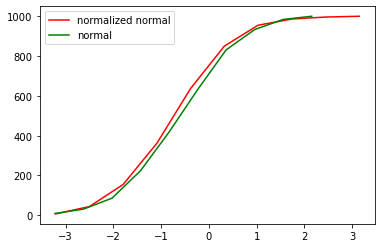

In [22]:
a_norm = np.random.normal(np.mean(a), np.std(a), len(a))

values, base = np.histogram(a)
values_norm, base_norm = np.histogram(a_norm)

cumulative = np.cumsum(values)
cumulative_norm = np.cumsum(values_norm)

plt.plot(base[:-1], cumulative, c='red',label='normalized normal')
plt.plot(base_norm[:-1], cumulative_norm, c='green',label='normal')
plt.legend()
plt.show()

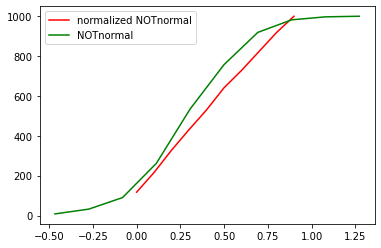

In [23]:
b_norm = np.random.normal(np.mean(b), np.std(b), len(b))

values, base = np.histogram(b)
values_norm, base_norm = np.histogram(b_norm)

cumulative = np.cumsum(values)
cumulative_norm = np.cumsum(values_norm)

plt.plot(base[:-1], cumulative, c='red',label='normalized NOTnormal')
plt.plot(base_norm[:-1], cumulative_norm, c='green',label='NOTnormal')
plt.legend()
plt.show()

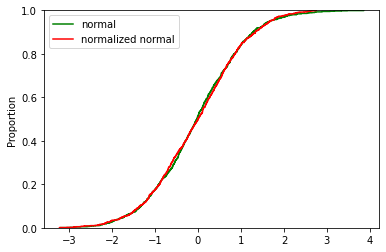

In [24]:
import seaborn as sns

sns.ecdfplot(a, c='green',label='normal')
sns.ecdfplot(a_norm, c='red',label='normalized normal')
plt.legend()
plt.show()

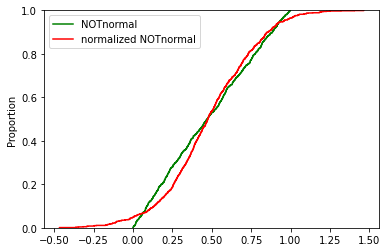

In [25]:
sns.ecdfplot(b, c='green',label='NOTnormal')
sns.ecdfplot(b_norm, c='red',label='normalized NOTnormal')
plt.legend()
plt.show()

In [27]:
from scipy.stats import kstest

result = (kstest(a, cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")


K-S statistic: 0.023887820707956503
p-value: 0.6093555316486208


# Method 06: Anderson-Darling test

Anderson-Darling test (A-D test) is a modification of Kolmogorov-Smirnov test described above. It tests whether a given sample of observations is drawn from a given probability distribution (in our case from normal distribution).

𝐻0: the data comes from a specified distribution

𝐻1: the data doesn’t come from a specified distribution

A-D test is more powerful than K-S test since it considers all of the values in the data and not just the one that produces maximum distance (like in K-S test). It also assigns more weight to the tails of a fitted distribution.

This test belongs to the quadratic empirical distribution function (EDF) statistics, and is given by:

$A^2 = n \int_{-\infty}^{\infty}  \bigg (F_n(x) – F(x) \bigg )^2 w(x) dF(x)$

where 𝐹 is the hypothesized distribution (in our case, normal distribution), 𝐹𝑛 is the ECDF (calculations discussed in the previous section), and 𝑤(𝑥) is the weighting function.

The weighting function is given by:

$w(x) = \bigg[F(x)(1-F(x))\bigg]^{-1}$

which allows to place more weight on observations in the tails of the distribution.

Given such a weighting function, the test statistic can be simplified to:

$A^2 = n \int_{-\infty}^{\infty}  \frac{(F_n(x) – F(x))^2}{ F(x)(1-F(x))} dF(x)$

Suppose we have a sample of data 𝑋 and we want to test whether this sample comes from a cumulative distribution function (𝐹(𝑥)) of the normal distribution.

We need to sort the data such that 𝑥1<𝑥2<…<𝑥𝑛 and then compute the 𝐴2 statistic as:

$A^2 = -n – \sum^{n}_{i=1} \frac{2i – 1}{n} \bigg [ln(F(x_i)) + ln(1 – F(x_{n+1-i})) \bigg ]$


In [28]:
from scipy.stats import anderson

result = (anderson(a, dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")


A-D statistic: 0.27855178540676206
Critical values: [0.574 0.653 0.784 0.914 1.088]
Significance levels: [15.  10.   5.   2.5  1. ]


In [29]:
from scipy.stats import anderson

result = (anderson(b, dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

A-D statistic: 11.5569581955059
Critical values: [0.574 0.653 0.784 0.914 1.088]
Significance levels: [15.  10.   5.   2.5  1. ]


Let’s say we want to test our hypothesis at the 5% level, meaning that the critical value we will use is middle value 0.784(from the output above).

Since the computer A-D test statistic (11.5) is less than the critical value (0.78), we fail to reject the null hypothesis and conclude that the sample data of Microsoft stock returns comes from a normal distribution.

In [31]:
help(anderson)

Help on function anderson in module scipy.stats.morestats:

anderson(x, dist='norm')
    Anderson-Darling test for data coming from a particular distribution.
    
    The Anderson-Darling test tests the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    dist : {'norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1'}, optional
        The type of distribution to test against.  The default is 'norm'.
        The names 'extreme1', 'gumbel_l' and 'gumbel' are synonyms for the
        same distribution.
    
    Returns
    -------
    statistic : float
        The Anderson-Darling test statistic.
    critical_valu